# Calculating time-consistent neutral density surfaces 

In [1]:
import neutralocean
import sys
import numpy as np
import matplotlib.pyplot as plt

# Locally load neutralNEMO
sys.path.append('../src/neutralNEMO/')
import grid
import surf
import eos
import nc_time_axis

# Model parameters

In [2]:
data_path = "../example_data/GYRE_1m_04110101_04201230_grid_T.nc"
grid_path = "../example_data/mesh_mask.nc"

itv = 10

# Load some example data

In [3]:
hgd = grid.load_hgriddata( grid_path )
zgd = grid.load_zgriddata( grid_path , vert_dim="nav_lev")
tsd = surf.load_tsdata(data_path, zgd, to_varname="votemper", so_varname="vosaline")

Loading masks directly from files


# Create neutralocean grid object

In [4]:
neutral_grid = grid.build_nemo_hgrid(hgd, iperio=False, jperio=False, gridtype="rectilinear")

# Define the equation of state

In [5]:
seos = eos.NEMO_eos( 'seos' , rn_a0 = 1.655e-1, rn_b0 = 7.655e-1,
                 rn_nu = 0., rn_lambda1 = 0., rn_lambda2 = 0.,
                 rn_mu1 = 0., rn_mu2 = 0. )

# seos = eos.NEMO_eos('teos10')

# Calculate omega surfaces for a given timestep ($t_v$)

In [6]:
# zpins = [100.,200.,1000.]
# ipins = [10,10,5]
# jpins = [5,5,9]
# tpins = [itv, itv, itv]

# surf_itv = surf.find_omega_surfs( tsd, neutral_grid , zgd, zpins, ipins, jpins, tpins,
#                                       eos=seos, ITER_MAX=10, eos_type='insitu')

In [7]:
# surf_itv

We now isolate the reference cast

In [8]:
# nt = len(tsd['to'].time_counter)
# print(f'nt = {nt}')

# for ipin, jpin, rho, z0 in zip(surf_itv.ipin, surf_itv.jpin, surf_itv.rho_ver, zpins):

#     print(rho)
    
#     castT = tsd['to'].isel(x=ipin, y=jpin)
#     castS = tsd['so'].isel(x=ipin, y=jpin)
#     castZ = zgd['deptht'].where(zgd['tmask3d']).isel(x=ipin, y=jpin)
    
#     # castZ_pair = castZ.drop_vars('time_counter').expand_dims(dim={'time_counter':2})
    
#     # After casts >>> 
#     print('AFTER casts')        
#     castT_after = castT.isel(time_counter=np.arange(itv,nt,1,dtype=int))
#     castS_after = castS.isel(time_counter=np.arange(itv,nt,1,dtype=int))
#     castZ_after = castZ.broadcast_like(castT_after)
    
#     n_after = neutralocean.traj.neutral_trajectory(S=castS_after, T=castT_after, P=castZ_after, p0=z0, vert_dim='z_t')

#     # Before casts >>>
#     castT_before = castT.isel(time_counter=np.arange(itv,-1,-1,dtype=int))
#     castS_before = castS.isel(time_counter=np.arange(itv,-1,-1,dtype=int))
#     castZ_before = castZ.broadcast_like(castT_before)

#     n_before = neutralocean.traj.neutral_trajectory(S=castS_before, T=castT_before, P=castZ_before, p0=z0, vert_dim='z_t')

#     n_S = np.append(n_before[0][::-1], n_after[0][1:])
#     n_T = np.append(n_before[1][::-1], n_after[1][1:])
#     n_Z = np.append(n_before[2][::-1], n_after[2][1:])

    


In [9]:
# plt.plot(n_Z)

In [10]:
list(tsd["to"]["time_counter"].isel(time_counter=[8]).values)

[cftime.Datetime360Day(411, 9, 16, 0, 0, 0, 0, has_year_zero=True)]

In [11]:
zpins = np.arange(100,4000,500, dtype=float)
ipins = [10]*len(zpins)
jpins = [5]*len(zpins)
tpins = [100]*len(zpins)

surf_test, surf_pin = surf.find_evolving_omega_surfs( tsd, neutral_grid, zgd, zpins, ipins, jpins, tpins, calc_veronis=True, calc_potsurf=True, itmin = 90, itmax=110)


/Users/andles/miniconda3/envs/neutralNEMO/lib/python3.8/site-packages/neutralocean/surface/_vertsolve.py:25: NumbaExperimentalFeatureWarning: First-class function type feature is experimental
  return _vertsolve(*args, eos, ppc_fn, _zero_potential)
/Users/andles/miniconda3/envs/neutralNEMO/lib/python3.8/site-packages/numba/core/utils.py:643: NumbaExperimentalFeatureWarning: First-class function type feature is experimental
  warnings.warn("First-class function type feature is experimental",


potential done |         273 wet casts | RMS(ϵ) = 1.59379500e-15  | 1.131 sec


/Users/andles/miniconda3/envs/neutralNEMO/lib/python3.8/site-packages/neutralocean/surface/_vertsolve.py:25: NumbaExperimentalFeatureWarning: First-class function type feature is experimental
  return _vertsolve(*args, eos, ppc_fn, _zero_potential)
/Users/andles/miniconda3/envs/neutralNEMO/lib/python3.8/site-packages/numba/core/utils.py:643: NumbaExperimentalFeatureWarning: First-class function type feature is experimental
  warnings.warn("First-class function type feature is experimental",


iter |    MAV(ϕ)     |    RMS(Δp)      | # wet casts (# new) |     RMS(ϵ)     | time (s)
   0 |                                 |         273         | 1.59379500e-15 | 0.549


/Users/andles/miniconda3/envs/neutralNEMO/lib/python3.8/site-packages/neutralocean/surface/_vertsolve.py:18: NumbaExperimentalFeatureWarning: First-class function type feature is experimental
  _vertsolve_omega(*args, eos, ppc_fn)
/Users/andles/miniconda3/envs/neutralNEMO/lib/python3.8/site-packages/numba/core/utils.py:643: NumbaExperimentalFeatureWarning: First-class function type feature is experimental
  warnings.warn("First-class function type feature is experimental",


   1 | 5.69578072e-10 | 8.63356351e-01 |         273 (    0) | 2.26302071e-16 | 1.659
   2 | 2.41359165e-12 | 6.17324386e-03 |         273 (    0) | 2.25116954e-16 | 0.002
   3 | 1.74564961e-13 | 4.61954591e-05 |         273 (    0) | 2.25115772e-16 | 0.001
   4 | 1.58350032e-13 | 3.48986094e-07 |         273 (    0) | 2.25115771e-16 | 0.002
   5 | 1.58255506e-13 | 2.19171755e-09 |         273 (    0) | 2.25115770e-16 | 0.001
   6 | 1.58254831e-13 | 8.16368251e-11 |         273 (    0) | 2.25115770e-16 | 0.099
   7 | 1.58254828e-13 | 7.59763749e-11 |         273 (    0) | 2.25115770e-16 | 0.001
   8 | 1.58254823e-13 | 9.11441228e-11 |         273 (    0) | 2.25115770e-16 | 0.001
   9 | 1.58254827e-13 | 1.07318717e-10 |         273 (    0) | 2.25115770e-16 | 0.001
  10 | 1.58254819e-13 | 8.10193042e-11 |         273 (    0) | 2.25115770e-16 | 0.001
potential done |         600 wet casts | RMS(ϵ) = 1.37033176e-15  | 0.002 sec
iter |    MAV(ϕ)     |    RMS(Δp)      | # wet casts (# new) |

<xarray.Dataset>
Dimensions:        (surfno: 8, time_counter: 21, y: 22, x: 32)
Coordinates:
    rho_pot        (surfno) float64 1.026e+03 1.027e+03 ... 1.028e+03 1.028e+03
    rho_ver        (surfno) float64 1.026e+03 1.027e+03 ... 1.028e+03 1.028e+03
  * time_counter   (time_counter) object 0418-07-16 00:00:00 ... 0420-03-16 0...
    nav_lat        (y, x) float32 14.85 15.52 16.19 16.87 ... 48.55 49.22 49.9
    nav_lon        (y, x) float32 -71.52 -70.85 -70.17 ... -66.13 -65.45 -64.78
    time_centered  object 0418-07-16 00:00:00
  * surfno         (surfno) float64 0.0 1.0 2.0 3.0 4.0 5.0 6.0 7.0
Dimensions without coordinates: y, x
Data variables:
    potsurf_z      (time_counter, surfno, y, x) float64 nan nan nan ... nan nan
    potsurf_s      (time_counter, surfno, y, x) float64 nan nan nan ... nan nan
    potsurf_t      (time_counter, surfno, y, x) float64 nan nan nan ... nan nan
    omsurf_z       (time_counter, surfno, y, x) float64 nan nan nan ... nan nan
    omsurf_s       (

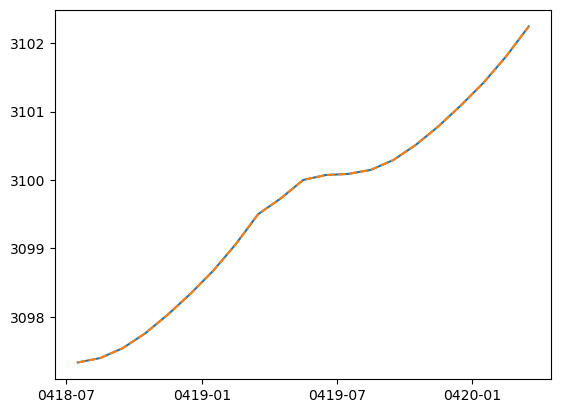

In [20]:
print(surf_test)
print(surf_pin)

for i in [6]:#len(surf_test.surfno)):
    plt.plot(surf_test.time_counter, surf_test['omsurf_z'].isel(surfno=i, y=5,x=10))

In [13]:
surf_pin.isel(surfno=2, x=10, y=5)['omsurf_z'].values

array(1100.)

In [14]:
surf_test.rho_ver

<xarray.DataArray 'rho_ver' (surfno: 8)>
array([1025.77692326, 1027.4707929 , 1027.593695  , 1027.83812861,
       1027.95187886, 1027.97539683, 1027.98255425, 1027.98473004])
Coordinates:
    rho_pot        (surfno) float64 1.026e+03 1.027e+03 ... 1.028e+03 1.028e+03
    rho_ver        (surfno) float64 1.026e+03 1.027e+03 ... 1.028e+03 1.028e+03
    time_centered  object 0418-07-16 00:00:00
  * surfno         (surfno) float64 0.0 1.0 2.0 3.0 4.0 5.0 6.0 7.0